<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Random-Forests" data-toc-modified-id="Random-Forests-0">Random Forests</a></span><ul class="toc-item"><li><span><a href="#读入数据" data-toc-modified-id="读入数据-0.1">读入数据</a></span></li><li><span><a href="#获取数据的基本信息" data-toc-modified-id="获取数据的基本信息-0.2">获取数据的基本信息</a></span></li><li><span><a href="#数据解读（按照数据集官方所给解释）" data-toc-modified-id="数据解读（按照数据集官方所给解释）-0.3">数据解读（按照数据集官方所给解释）</a></span></li><li><span><a href="#特征可视化分析" data-toc-modified-id="特征可视化分析-0.4">特征可视化分析</a></span></li><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-0.5">数据预处理</a></span></li><li><span><a href="#训练及预测" data-toc-modified-id="训练及预测-0.6">训练及预测</a></span></li><li><span><a href="#结果分析" data-toc-modified-id="结果分析-0.7">结果分析</a></span><ul class="toc-item"><li><span><a href="#不同分类算法对比" data-toc-modified-id="不同分类算法对比-0.7.1">不同分类算法对比</a></span></li><li><span><a href="#特征重要性分析" data-toc-modified-id="特征重要性分析-0.7.2">特征重要性分析</a></span></li></ul></li><li><span><a href="#实验心得" data-toc-modified-id="实验心得-0.8">实验心得</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-0.9">Reference</a></span></li></ul></li></ul></div>

adding path


# Random Forests


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve,average_precision_score,auc

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

## 读入数据
利用pandas自带的csv读取函数，得到DataFrame类型的结果。

In [13]:
heart_disease_df = pd.read_csv("C:/Users/Guo/Downloads/"\
 "模式识别作业程序范例/心脏病检测-随机森林python实现/"\
 "参考程序与数据/heart.csv") #字符串过长的分割为多行的方法

## 获取数据的基本信息
事实上由于数据量比较小，也可选用直接使用本地excel软件打开.csv文件查阅

In [18]:
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 数据解读（按照数据集官方所给解释）
对于数据集中每一项的数据的专业意义有基本的了解是更好处理数据的基础，能够帮助我们深入建立对于数据集的认知。
* age - 年龄
* sex - (1 = male(男性); 0 = (女性))
* cp - chest pain type(胸部疼痛类型)（1：典型的心绞痛-typical，2：非典型心绞痛-atypical，3：没有心绞痛-non-anginal，4：无症状-asymptomatic）
* trestbps - 静息血压 (in mm Hg on admission to the hospital)
* chol - 胆固醇 in mg/dl
* fbs - (空腹血糖 > 120 mg/dl) (1 = true; 0 = false)
* restecg - 静息心电图测量（0：普通，1：ST-T波异常，2：可能左心室肥大）
* thalach - 最高心跳率
* exang - 运动诱发心绞痛 (1 = yes; 0 = no)
* oldpeak - 运动相对于休息引起的ST抑制
* slope - 运动ST段的峰值斜率（1：上坡-upsloping，2：平的-flat，3：下坡-downsloping）
* ca - 主要血管数目(0-4)
* thal - 一种叫做地中海贫血的血液疾病（3 = normal; 6 = 固定的缺陷-fixed defect; 7 = 可逆的缺陷-reversable defect）
* target - 是否患病 (1=yes, 0=no)

## 特征可视化分析 
获取每一个特征的分布情况，有助于下一步对于数据预处理。

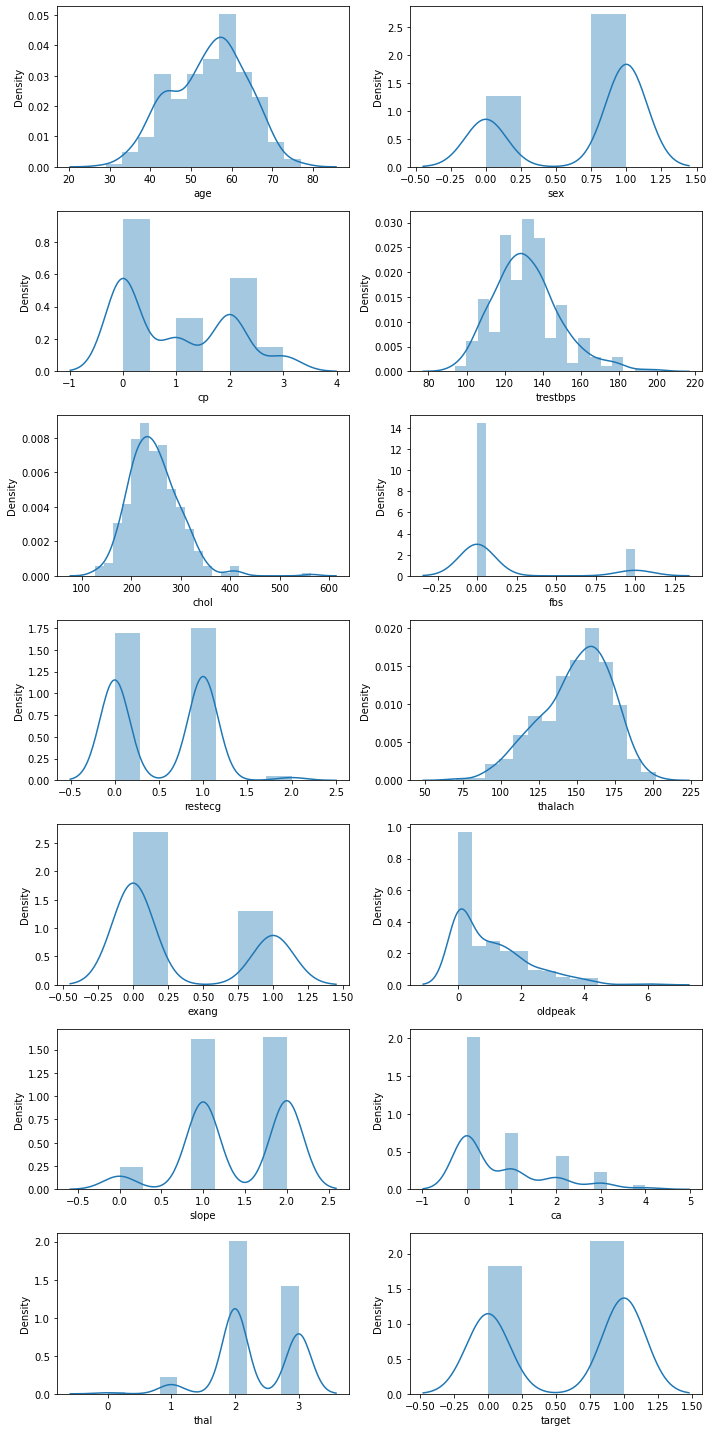

In [24]:
fig,axes = plt.subplots(7,2,figsize=(10,20))
for x in range(0,14):
    plt.subplot(7,2,x+1)
    sns.distplot(heart_disease_df.iloc[:,x],kde=True)

plt.tight_layout()

heatmap：热力图，又名相关系数图。根据热力图中不同方块颜色对应的相关系数的大小，可以判断出变量之间相关性的大小。（值得注意的是，该相关系数只能度量出变量之间的线性相关关系；也就是说，相关系数越高，则变量间的线性相关程度越高。对于相关系数小的两个变量，只能说明变量间的线性相关程度弱，但不能说明变量之间不存在其它的相关关系，如曲线关系等。）

热力图右侧的刻度展示了不同相关系数对应的颜色深浅。


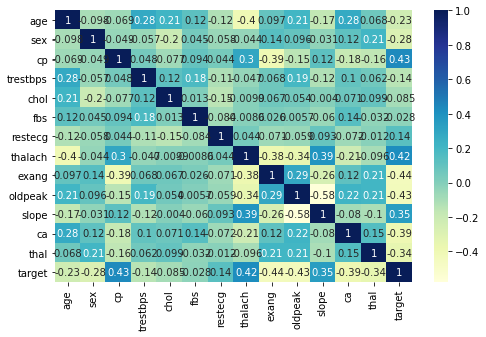

In [29]:
# heatmap绘制
plt.figure(figsize=(8,5))
sns.heatmap(heart_disease_df.corr(),cmap="YlGnBu",annot=True)
plt.show()

通过绘制热力图，我们可以来探究各特征之间的相关性，进而探究自变量之间的多重共线性以及各变量与患心脏病之间的相关关系强弱。

由上图我们可以看出cp、thalach、slope三个特征对于患心脏病的影响最大；
其次，相关系数较高的变量之间存在很强的多重共线性。在进行特征工程时可以考虑其中的某些变量，以免导致因多重共线性造成的过拟合。

## 数据预处理


In [33]:
features = heart_disease_df.drop(columns=['target'])
targets = heart_disease_df['target']

In [34]:
# sex
features.loc[features['sex']==0,'sex'] = 'female'
features.loc[features['sex']==1,'sex'] = 'male'

# cp
features.loc[features['cp'] == 1,'cp'] = 'typical'
features.loc[features['cp'] == 2,'cp'] = 'atypical'
features.loc[features['cp'] == 3,'cp'] = 'non-anginal'
features.loc[features['cp'] == 4,'cp'] = 'asymptomatic'

# fbs
features.loc[features['fbs'] == 1,'fbs'] = 'true'
features.loc[features['fbs'] == 0,'fbs'] = 'false'

# exang
features.loc[features['exang'] == 1,'exang'] = 'true'
features.loc[features['exang'] == 0,'exang'] = 'false'

# slope
features.loc[features['slope'] == 1,'slope'] = 'true'
features.loc[features['slope'] == 2,'slope'] = 'true'
features.loc[features['slope'] == 3,'slope'] = 'true'

# thal
features.loc[features['thal'] == 3,'thal'] = 'normal'
features.loc[features['thal'] == 3,'thal'] = 'fixed'
features.loc[features['thal'] == 3,'thal'] = 'reversable'

# restecg
# 0：普通，1：ST-T波异常，2：可能左心室肥大
features.loc[features['restecg'] == 0,'restecg'] = 'normal'
features.loc[features['restecg'] == 1,'restecg'] = 'ST-T abnormal'
features.loc[features['restecg'] == 2,'restecg'] = 'Left ventricular hypertrophy'

# ca
features['ca'].astype("object")

# thal
features.thal.astype("object")

features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,male,non-anginal,145,233,true,normal,150,false,2.3,0,0,1
1,37,male,atypical,130,250,false,ST-T abnormal,187,false,3.5,0,0,2
2,41,female,typical,130,204,false,normal,172,false,1.4,true,0,2
3,56,male,typical,120,236,false,ST-T abnormal,178,false,0.8,true,0,2
4,57,female,0,120,354,false,ST-T abnormal,163,true,0.6,true,0,2


In [36]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 30.9+ KB


In [40]:
# get_dummies是利用pandas实现one hot encode
features = pd.get_dummies(features)
print(features.head())
print(features.info())

   age  trestbps  chol  thalach  oldpeak  ca  sex_female  sex_male  cp_0  \
0   63       145   233      150      2.3   0           0         1     0   
1   37       130   250      187      3.5   0           0         1     0   
2   41       130   204      172      1.4   0           1         0     0   
3   56       120   236      178      0.8   0           0         1     0   
4   57       120   354      163      0.6   0           1         0     1   

   cp_atypical  ...  restecg_ST-T abnormal  restecg_normal  exang_false  \
0            0  ...                      0               1            1   
1            1  ...                      1               0            1   
2            0  ...                      0               1            1   
3            0  ...                      1               0            1   
4            0  ...                      1               0            0   

   exang_true  slope_0  slope_true  thal_0  thal_1  thal_2  thal_normal  
0           0     

In [44]:
# 对特征数据进行归一化；
# 维基百科： 归一化后加快了梯度下降求最优解的速度；归一化有可能提高精度
# 均值-标准差归一化，保证均值为0标准差为1
features_temp = StandardScaler().fit_transform(features)

# 划分训练集、测试集
# 这里我们令训练集占80%，测试集占20%
X_train,X_test,y_train,y_test = train_test_split(features_temp,targets,test_size=0.2)


## 训练及预测

In [45]:
# 评价曲线的绘制函数
def plotting(estimator,y_test):
    fig,axes = plt.subplots(1,2,figsize=(10,5))
    # 利用训练好的模型进行预测
    y_predict_proba = estimator.predict_proba(X_test)
    precisions,recalls,thretholds = precision_recall_curve(y_test,y_predict_proba[:,1])
    axes[0].plot(precisions,recalls)
    axes[0].set_title("平均精准率：%.2f"%average_precision_score(y_test,y_predict_proba[:,1]))
    axes[0].set_xlabel("召回率")
    axes[0].set_ylabel("精准率")

    fpr,tpr,thretholds = roc_curve(y_test,y_predict_proba[:,1])
    axes[1].plot(fpr,tpr)
    axes[1].set_title("AUC值：%.2f"%auc(fpr,tpr))
    axes[1].set_xlabel("FPR")
    axes[1].set_ylabel("TPR")

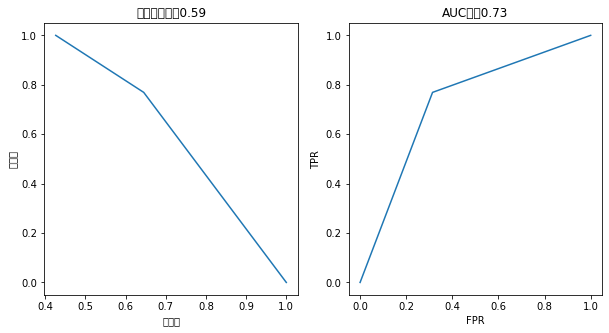

In [46]:
# 决策树
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train,y_train) # 训练过程

plotting(tree,y_test)

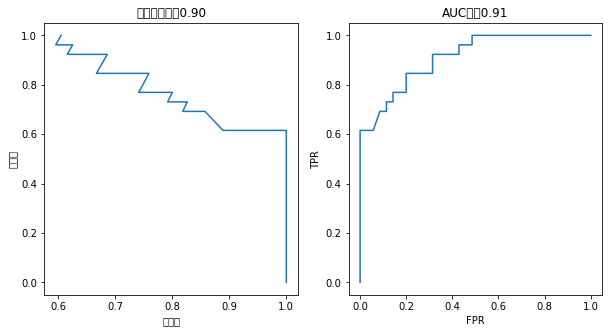

In [47]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

plotting(rf,y_test)

## 结果分析


### 不同分类算法对比

### 特征重要性分析
随机森林能够度量每个特征的重要性，我们可以依据这个重要性指标进而选择最重要的特征。sklearn中已经实现了用随机森林评估特征重要性，在训练好随机森林模型后，直接调用feature_importances属性就能得到每个特征的重要性。

thalach                                 0.109231
cp_0                                    0.090789
thal_2                                  0.087376
oldpeak                                 0.084759
age                                     0.081683
thal_normal                             0.079295
ca                                      0.077725
trestbps                                0.071344
chol                                    0.070557
exang_true                              0.053106
exang_false                             0.049847
sex_female                              0.023367
sex_male                                0.020948
restecg_normal                          0.016170
cp_non-anginal                          0.014840
cp_atypical                             0.013467
restecg_ST-T abnormal                   0.013410
fbs_true                                0.010301
fbs_false                               0.009595
cp_typical                              0.008777
thal_1              

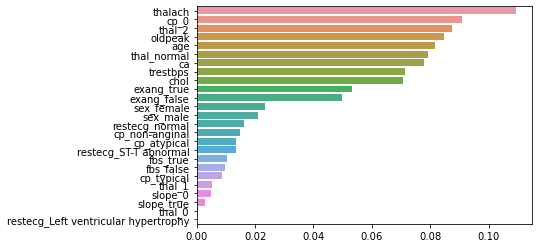

In [55]:
importances = pd.Series(data=rf.feature_importances_,
                        index=features.columns).sort_values(ascending=False)
print(importances)
sum = 0 
for i in importances:
    sum += i
# 可见所有的importance之和为1，且thalach的重要性
print("sum = ", sum)
#可视化
sns.barplot(y=importances.index,x=importances.values,orient='h')
plt.show()


## 实验心得

决策树与决策森林（随机森林）

## Reference

[1]机器学习：sklearn实现心脏病预测 https://blog.csdn.net/qq_41375318/article/details/105332822

[2]实验四：基于随机森林的宫颈癌预测 https://blog.csdn.net/hqllqh/article/details/109291920

[3]机器学习第一步，这是一篇手把手的随机森林入门实战 https://zhuanlan.zhihu.com/p/107389097

[4]决策树与随机森林 https://www.cnblogs.com/dblsha/p/10281470.html